# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [2]:
DataType = "BreastCancer"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.0)
AnalyzedData011 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.011)
AnalyzedData013 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.013)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.015)
AnalyzedData017 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.017)
AnalyzedData019 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.019)
AnalyzedData021 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.021)
AnalyzedData023 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.023)
AnalyzedData025 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.025)
AnalyzedData027 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.027)

# Shape

In [3]:
ShapeTable = {"DUREAL":[AnalyzedData011["Error_DUREAL"].shape[0],
                        AnalyzedData013["Error_DUREAL"].shape[0],
                        AnalyzedData015["Error_DUREAL"].shape[0],
                        AnalyzedData017["Error_DUREAL"].shape[0],
                        AnalyzedData019["Error_DUREAL"].shape[0],
                        AnalyzedData021["Error_DUREAL"].shape[0],
                        AnalyzedData023["Error_DUREAL"].shape[0],
                        AnalyzedData025["Error_DUREAL"].shape[0],
                        AnalyzedData027["Error_DUREAL"].shape[0]],
              "UNREAL": [AnalyzedData011["Error_UNREAL"].shape[0],
                         AnalyzedData013["Error_UNREAL"].shape[0], 
                         AnalyzedData015["Error_UNREAL"].shape[0], 
                         AnalyzedData017["Error_UNREAL"].shape[0], 
                         AnalyzedData019["Error_UNREAL"].shape[0], 
                         AnalyzedData021["Error_UNREAL"].shape[0], 
                         AnalyzedData023["Error_UNREAL"].shape[0], 
                         AnalyzedData025["Error_UNREAL"].shape[0], 
                         AnalyzedData027["Error_UNREAL"].shape[0]]}
ShapeTable = pd.DataFrame(ShapeTable)
ShapeTable.index = range(11,29,2)
ShapeTable

,DUREAL,UNREAL
11,100,100
13,100,100
15,100,100
17,100,100
19,100,100
21,100,100
23,100,100
25,100,100
27,100,100


# Run Time

In [4]:
TimeTable = {"DUREAL Mean":[str(round(np.mean(AnalyzedData011["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData013["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData017["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData019["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData021["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData023["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData025["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData027["Time_DUREAL"])/60,2))],
              "UNREAL Mean": [str(round(np.mean(AnalyzedData011["Time_UNREAL"])/60,2)),
                         str(round(np.mean(AnalyzedData013["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData017["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData019["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData021["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData023["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData025["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData027["Time_UNREAL"])/60,2))],
                "DUREAL max":[str(round(np.max(AnalyzedData011["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData013["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData017["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData019["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData021["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData023["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData025["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData027["Time_DUREAL"])/60,2))],
              "UNREAL max": [str(round(np.max(AnalyzedData011["Time_UNREAL"])/60,2)),
                         str(round(np.max(AnalyzedData013["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData017["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData019["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData021["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData023["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData025["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData027["Time_UNREAL"])/60,2))]
                         }
TimeTable = pd.DataFrame(TimeTable)
TimeTable.index = range(11,29,2)
TimeTable

,DUREAL Mean,UNREAL Mean,DUREAL max,UNREAL max
11,16.51,15.9,61.49,62.63
13,26.4,26.14,92.77,96.05
15,50.85,49.13,181.78,198.76
17,95.8,97.54,378.2,355.64
19,147.99,146.44,537.76,498.47
21,305.04,303.99,1020.19,992.31
23,477.33,457.74,2000.74,1435.25
25,395.78,385.5,2464.96,2493.02
27,1389.61,1388.16,5208.27,5219.84


# Error Vec

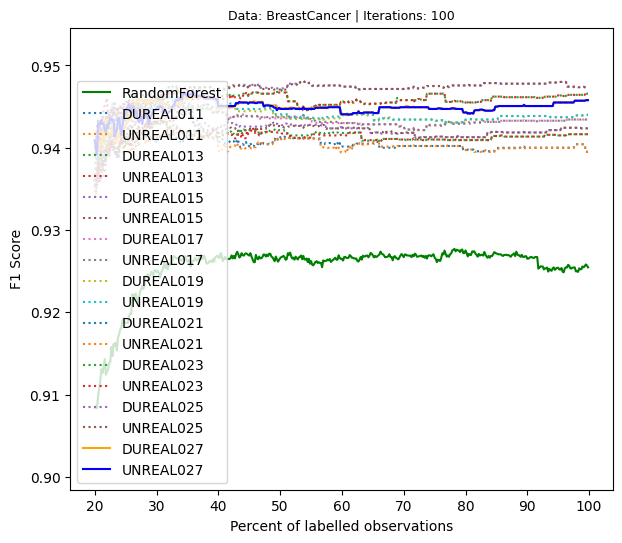

In [24]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData011['Error_DUREAL'].shape[0]}"
colors = {
    "RandomForest": "green",
    # "DUREAL011": "orange",
    # "UNREAL011": "blue",
    "DUREAL027": "orange",
    "UNREAL027": "blue"
}

linestyles = {
    "RandomForest": "solid",
    # "DUREAL011": "solid",
    # "UNREAL011": "solid",
    "DUREAL027": "solid",
    "UNREAL027": "solid"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 RandomForest = RandomForesResults["Error_RF"],
                 DUREAL011 = AnalyzedData011["Error_DUREAL"],
                 UNREAL011 = AnalyzedData011["Error_UNREAL"],
                 DUREAL013 = AnalyzedData013["Error_DUREAL"],
                 UNREAL013 = AnalyzedData013["Error_UNREAL"],
                 DUREAL015 = AnalyzedData015["Error_DUREAL"],
                 UNREAL015 = AnalyzedData015["Error_UNREAL"],
                 DUREAL017 = AnalyzedData017["Error_DUREAL"],
                 UNREAL017 = AnalyzedData017["Error_UNREAL"],
                 DUREAL019 = AnalyzedData019["Error_DUREAL"],
                 UNREAL019 = AnalyzedData019["Error_UNREAL"],
                 DUREAL021 = AnalyzedData021["Error_DUREAL"],
                 UNREAL021 = AnalyzedData021["Error_UNREAL"],
                 DUREAL023 = AnalyzedData023["Error_DUREAL"],
                 UNREAL023 = AnalyzedData023["Error_UNREAL"],
                 DUREAL025 = AnalyzedData027["Error_DUREAL"],
                 UNREAL025 = AnalyzedData027["Error_UNREAL"],
                 DUREAL027 = AnalyzedData021["Error_DUREAL"],
                 UNREAL027 = AnalyzedData021["Error_UNREAL"],
                 Colors = colors,
                 Linestyles=linestyles,
                # xlim = [20,70],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)

# Input

In [17]:
AnalyzedDataSmall = AnalyzedData011
AnalyzedDataLarge = AnalyzedData027

# Selection History

In [18]:
SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForesResults["SelectionHistory_RF"], DataType = DataType)
SelectionHistoryRank_UNREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_UNREAL"], DataType = DataType)
SelectionHistoryRank_DUREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_DUREAL"], DataType = DataType)
SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()
SelectionHistoryRank_UNREALLarge.sort_values(by = "AverageRank").head()
SelectionHistoryRank_DUREALLarge.sort_values(by = "AverageRank").head()

,AverageRank,ClumpThickness_10,CellSize_1,CellSize_10,CellShape_1,Adhesion_1,SingleEpithelialCellSize_2,BareNuclei_1,BareNuclei_10,NormalNucleoli_1,NormalNucleoli_10,Y
326,7.147059,1,1,0,1,1,1,0,1,0,0,1
288,8.671642,0,1,0,0,1,0,0,0,0,1,1
6,8.766667,0,1,0,1,1,1,0,1,1,0,0
299,9.101449,0,1,0,0,0,0,0,1,0,0,1
590,9.587302,0,0,1,0,0,0,1,0,1,0,1


# Tree Counts

In [19]:
UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioSmall = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioSmall, 
                              DUREAL_Average_TreeCountsRatioSmall,
                              np.round(UNREAL_Average_TreeCountsRatioSmall - DUREAL_Average_TreeCountsRatioSmall,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

UNREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioLarge = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioLarge, 
                              DUREAL_Average_TreeCountsRatioLarge,
                              np.round(UNREAL_Average_TreeCountsRatioLarge - DUREAL_Average_TreeCountsRatioLarge,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

In [20]:
UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 1)

## Number of All Trees

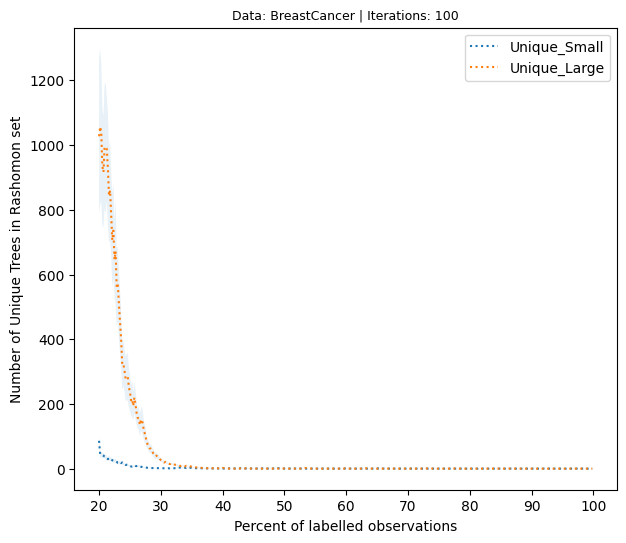

In [22]:
TreePlot = MeanVariancePlot(RelativeError = None,
                 Unique_Small = AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"],
                #  ALL_Small = AnalyzedDataSmall["TreeCounts_ALL_UNREAL"],
                 Unique_Large = AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"],
                #  ALL_Large = AnalyzedDataLarge["TreeCounts_ALL_UNREAL"],
                #  RatioSmall = AverageTreeCountRatioSmall,
                #  RatioLarge = AverageTreeCountRatioLarge,
                #  Colors = colors,
                #  Linestyles=linestyles,
                # xlim = [20,100],
                Y_Label = "Number of Unique Trees in Rashomon set",
                VarInput = False,
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.1,
                 CriticalValue = 1.96)